In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [21]:
df = pd.read_csv('avg_match_progression.csv')
df.head()

,ball,team1_runs,team1_wickets,team2_runs,team2_wickets
0,1,1.0,0.0,0.0,1.0
1,2,0.0,1.0,4.0,0.0
2,3,1.0,0.0,2.0,0.0
3,4,0.0,0.0,4.0,0.0
4,5,0.0,0.0,1.0,0.0


In [22]:
# Convert to cumulative sum
df['team1_runs'] = df['team1_runs'].cumsum()
df['team2_runs'] = df['team2_runs'].cumsum()

In [26]:
# Remove data that exceeds 140
df['team2_runs'] = df['team2_runs'].apply(lambda x: x if x <= 140 else np.nan)

c:\Users\natem\MiniConda3\envs\dscience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\natem\MiniConda3\envs\dscience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\natem\MiniConda3\envs\dscience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\natem\MiniConda3\envs\dscience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

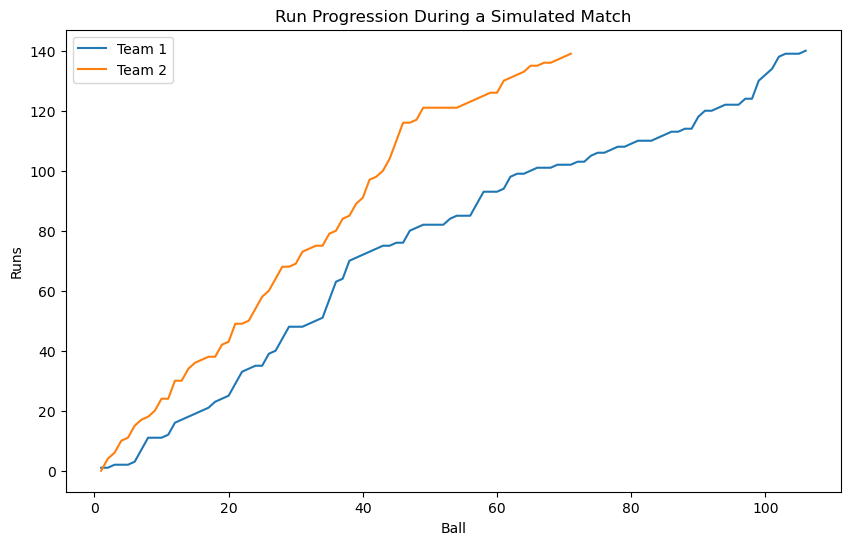

In [28]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='ball', y='team1_runs', label='Team 1')
sns.lineplot(data=df, x='ball', y='team2_runs', label='Team 2')
plt.legend()
plt.xlabel('Ball')
plt.ylabel('Runs')
plt.title('Run Progression During a Simulated Match')
plt.show()

In [32]:
first_innings_runs = pd.read_csv('first_innings_run_distribution.csv')
first_innings_runs.head()

,0
0,140
1,65
2,173
3,59
4,106


c:\Users\natem\MiniConda3\envs\dscience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\natem\MiniConda3\envs\dscience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


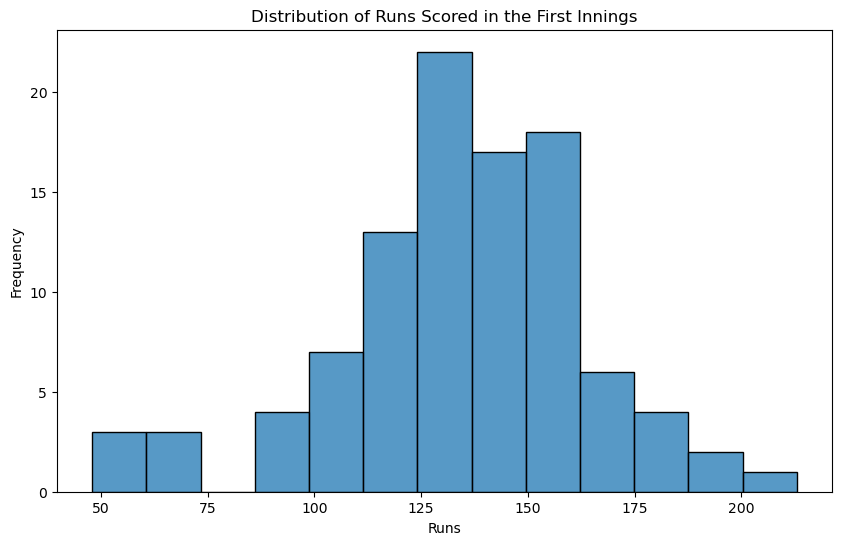

In [33]:
# Plot the distribution of runs scored in the first innings
plt.figure(figsize=(10, 6))
sns.histplot(first_innings_runs, x='0')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.title('Distribution of Runs Scored in the First Innings')
plt.show()

In [34]:
# Calculate total first innings runs in actual match data
ball_by_ball_ipl = pd.read_csv('ball_by_ball_ipl.csv')

In [40]:
# Find rows where innings changes from 1 to 2
innings_change = ball_by_ball_ipl['Innings'].diff() == 1
innings_change = innings_change.shift(-1).fillna(False)
ball_by_ball_ipl[innings_change]['Innings Runs']

122       235
373       140
615       129
863       187
1055      118
         ... 
238611    155
238857    169
239107    139
239320    165
239568    163
Name: Innings Runs, Length: 1005, dtype: int64

c:\Users\natem\MiniConda3\envs\dscience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\natem\MiniConda3\envs\dscience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\natem\MiniConda3\envs\dscience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\natem\MiniConda3\envs\dscience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

Text(0.5, 1.0, 'Distribution of Runs Scored in the First Innings')

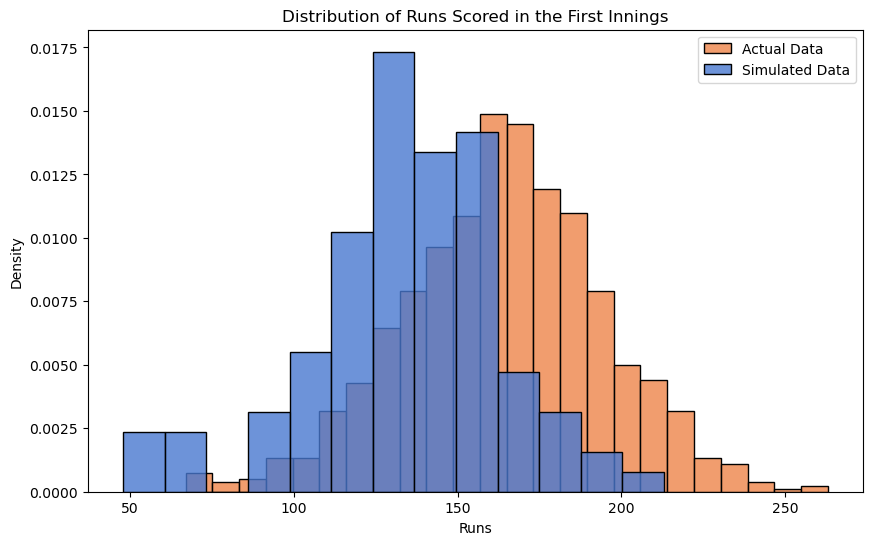

In [49]:
# Plot the distribution of the Innings Runs
pal = sns.color_palette('muted')
plt.figure(figsize=(10, 6))
sns.histplot(ball_by_ball_ipl[innings_change]['Innings Runs'], stat='density', color=pal[1], label='Actual Data', alpha=0.8)
sns.histplot(first_innings_runs, x='0', stat='density', color=pal[0], label='Simulated Data', alpha=0.8)
plt.legend()
plt.xlabel('Runs')
plt.ylabel('Density')
plt.title('Distribution of Runs Scored in the First Innings')